In [1]:
import pickle
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
images = glob.glob('calibration_wide/GO*.jpg')
print(images)

['calibration_wide/GOPR0055.jpg', 'calibration_wide/GOPR0034.jpg', 'calibration_wide/GOPR0048.jpg', 'calibration_wide/GOPR0035.jpg', 'calibration_wide/GOPR0059.jpg', 'calibration_wide/GOPR0049.jpg', 'calibration_wide/GOPR0041.jpg', 'calibration_wide/GOPR0046.jpg', 'calibration_wide/GOPR0070.jpg', 'calibration_wide/GOPR0047.jpg', 'calibration_wide/GOPR0043.jpg', 'calibration_wide/GOPR0060.jpg', 'calibration_wide/GOPR0044.jpg', 'calibration_wide/GOPR0032.jpg', 'calibration_wide/GOPR0069.jpg', 'calibration_wide/GOPR0040.jpg', 'calibration_wide/GOPR0067.jpg', 'calibration_wide/GOPR0033.jpg', 'calibration_wide/GOPR0038.jpg', 'calibration_wide/GOPR0052.jpg', 'calibration_wide/GOPR0045.jpg', 'calibration_wide/GOPR0066.jpg', 'calibration_wide/GOPR0051.jpg', 'calibration_wide/GOPR0037.jpg', 'calibration_wide/GOPR0042.jpg', 'calibration_wide/GOPR0036.jpg', 'calibration_wide/GOPR0062.jpg', 'calibration_wide/GOPR0068.jpg', 'calibration_wide/GOPR0061.jpg', 'calibration_wide/GOPR0054.jpg', 'calibrat

In [3]:
dist_pickle = pickle.load( open( "calibration_wide/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [4]:
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [5]:
def corners_unwarp(img, nx, ny, mtx, dist):
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(undistorted, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret:
        src = np.float32([corners[0].flatten(),
                          corners[nx-1].flatten(),
                          corners[-nx].flatten(),
                          corners[-1].flatten()])
        
        shape = (img.shape[1], img.shape[0])
        margin = 50
        dst = np.float32([[margin,                   margin],
                          [shape[0]-margin,          margin],
                          [margin,          shape[1]-margin],
                          [shape[0]-margin, shape[1]-margin]])
        M = cv2.getPerspectiveTransform(src, dst)
        #warped = np.copy(undistorted)  
        warped = cv2.warpPerspective(undistorted, M, shape, flags=cv2.INTER_LINEAR)
        return warped
    return None

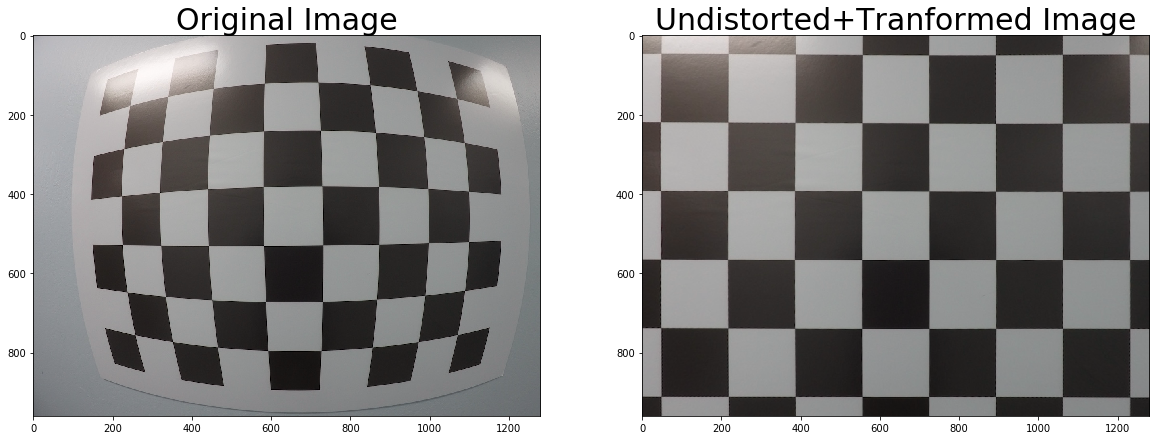

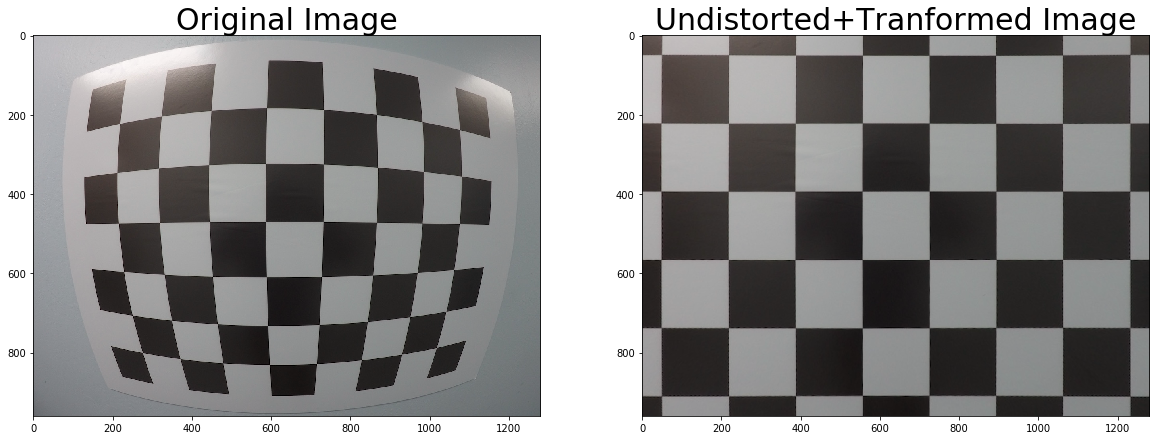

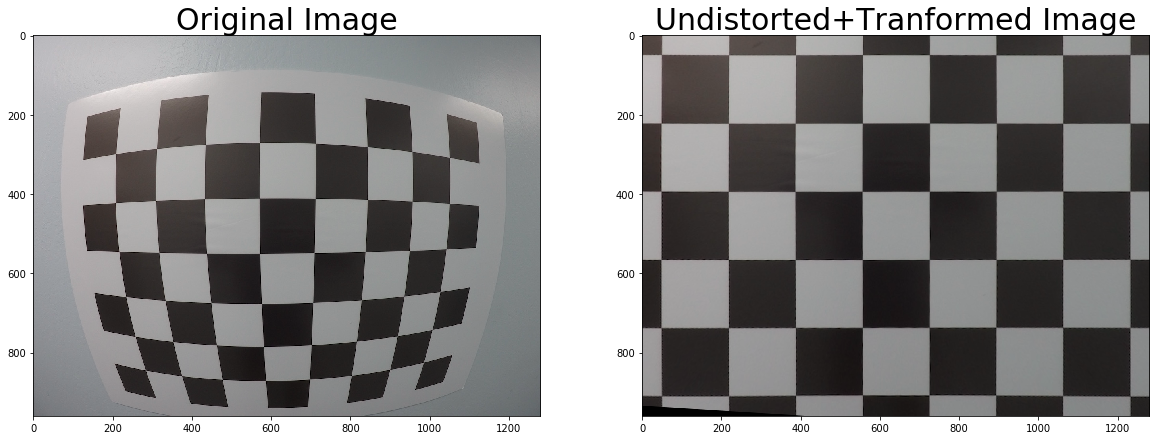

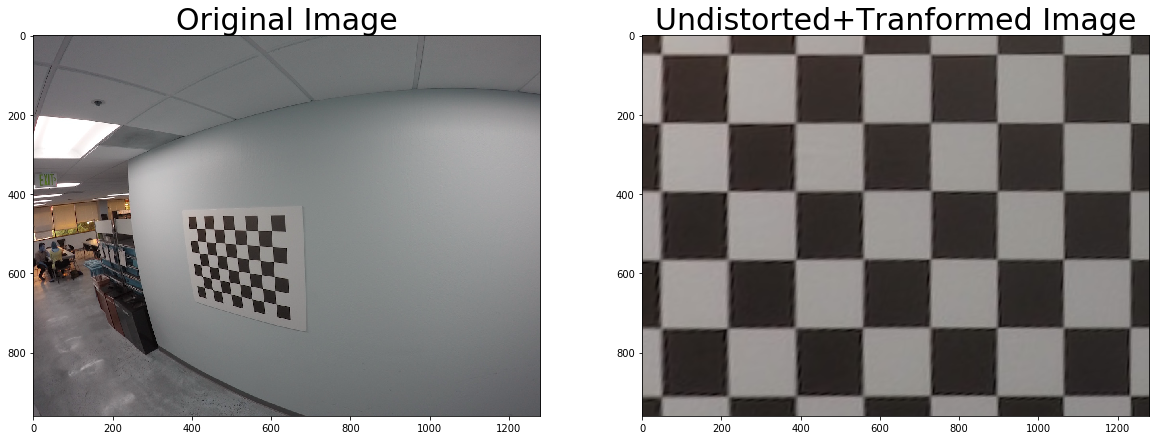

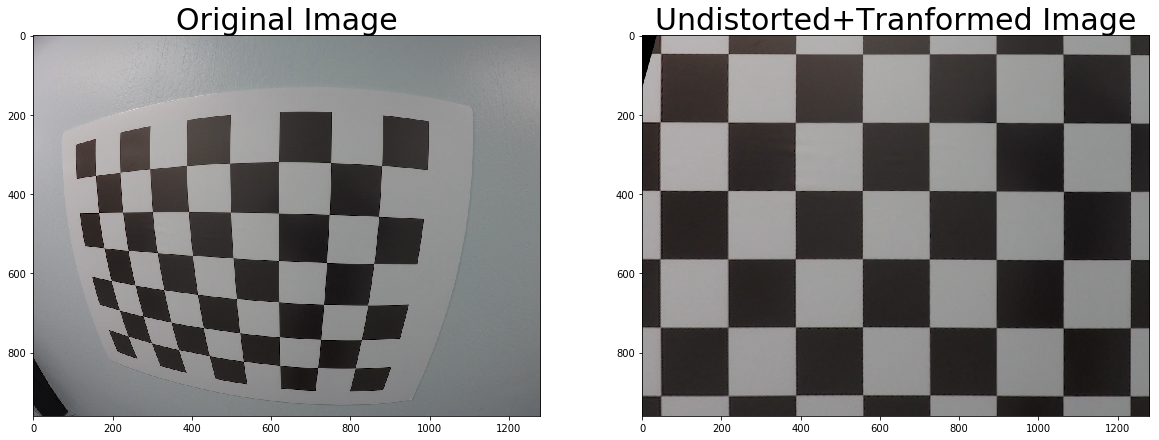

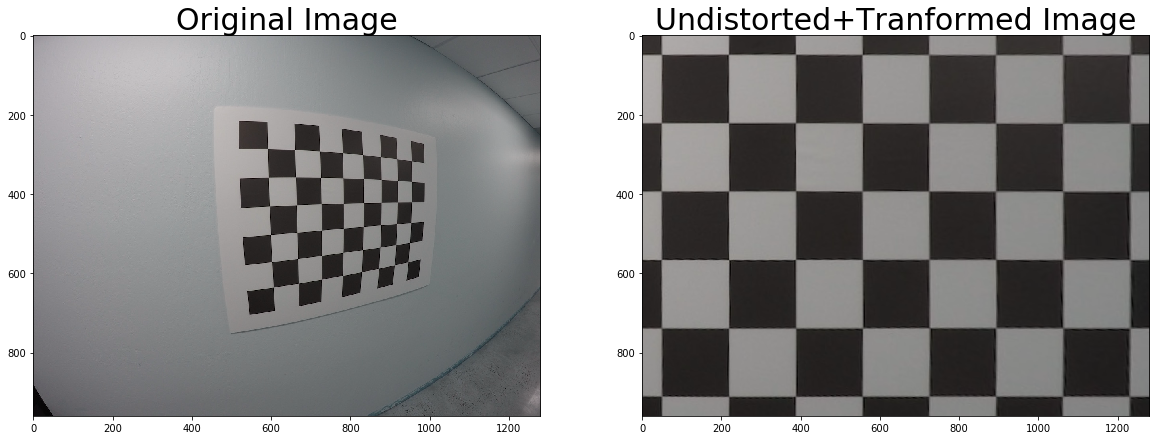

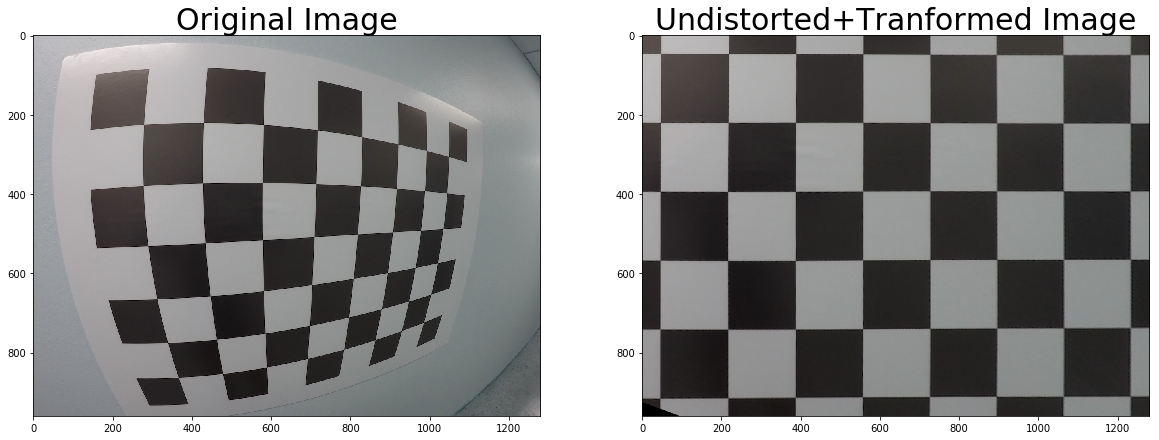

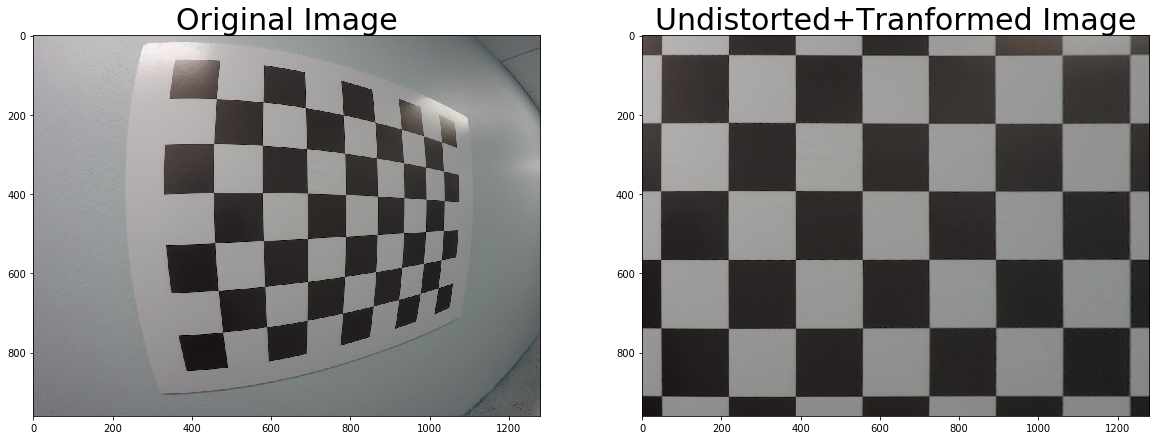

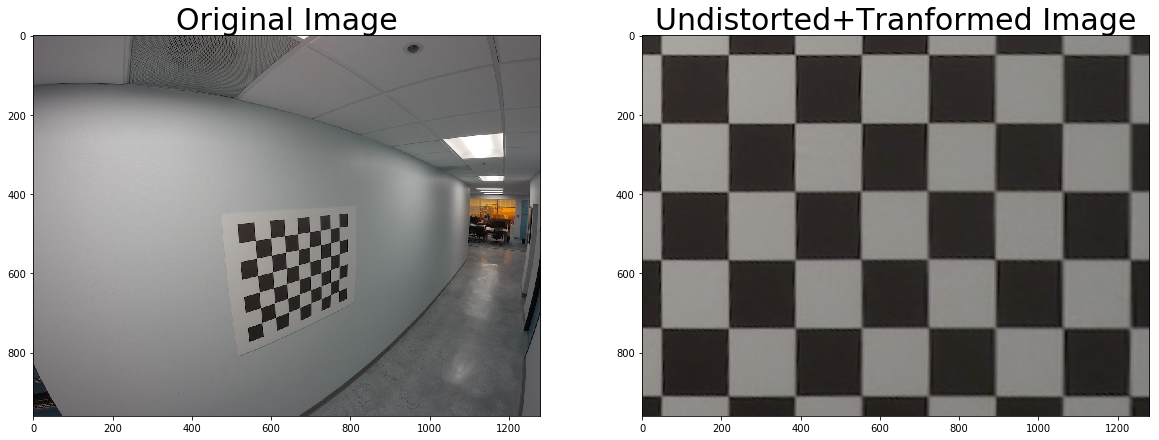

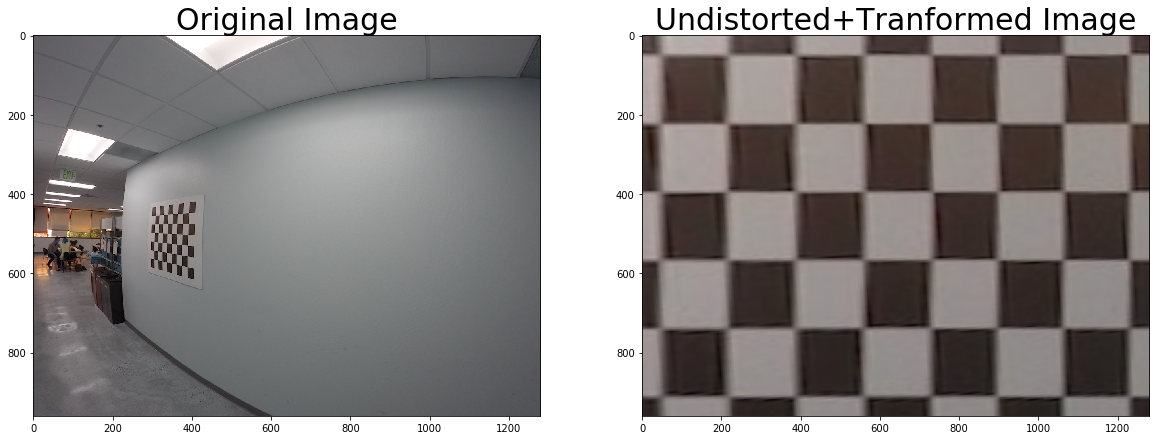

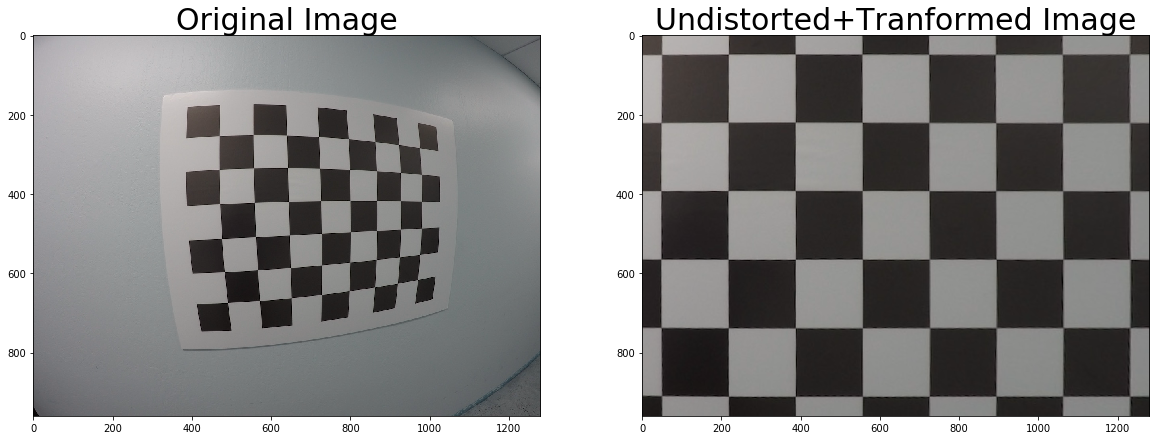

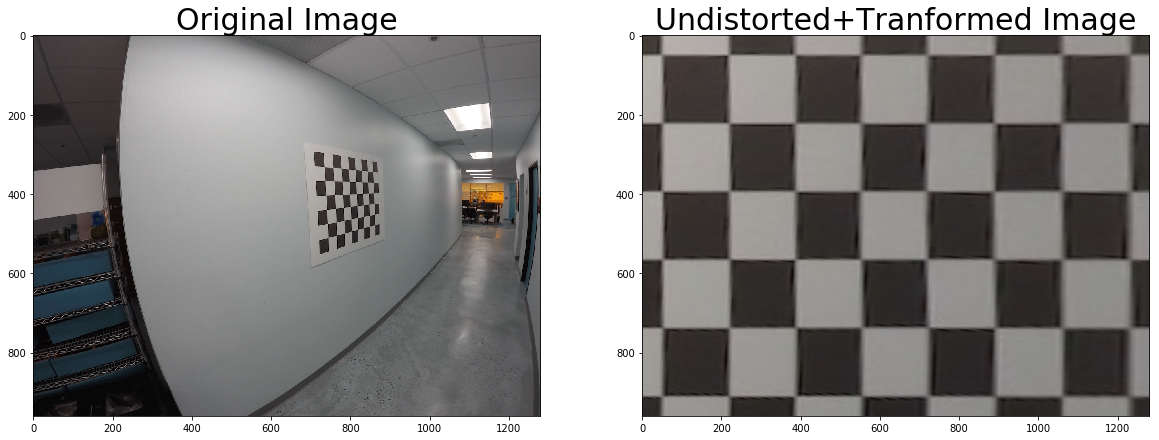

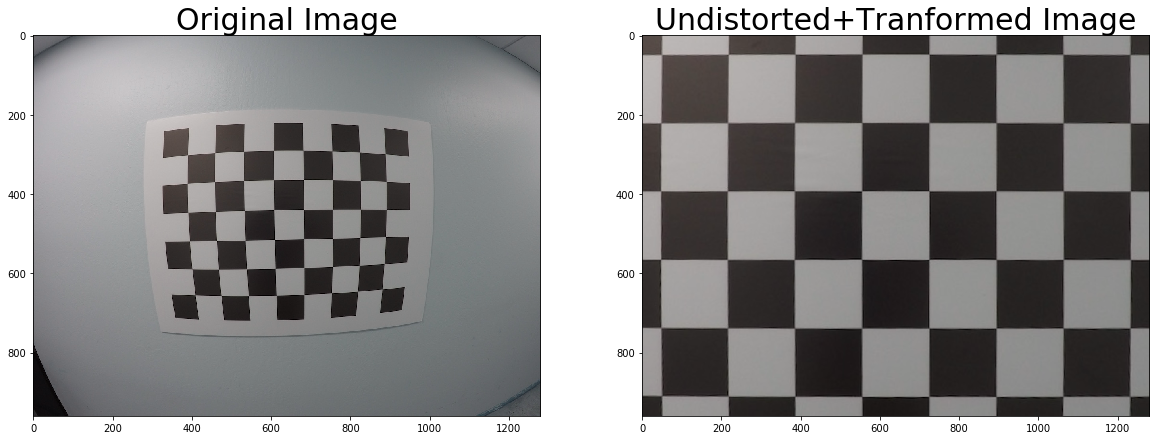

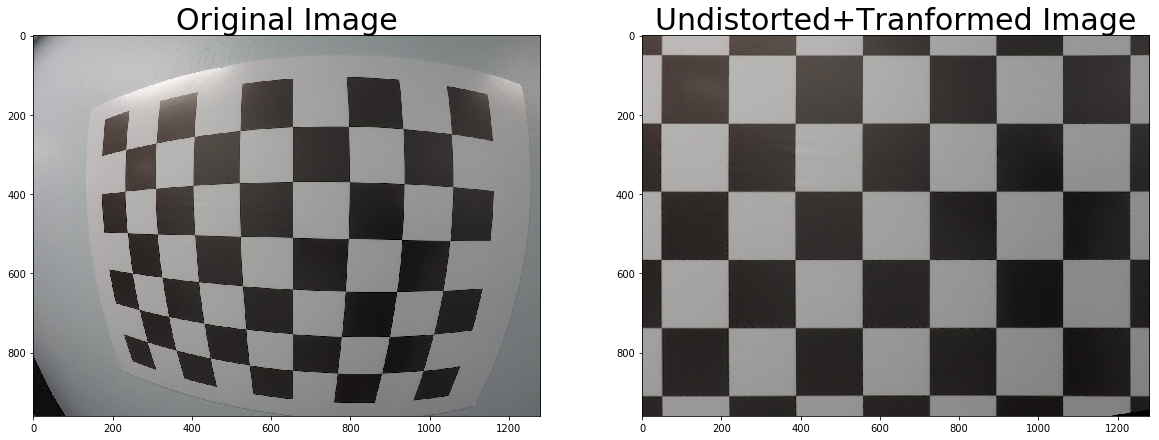

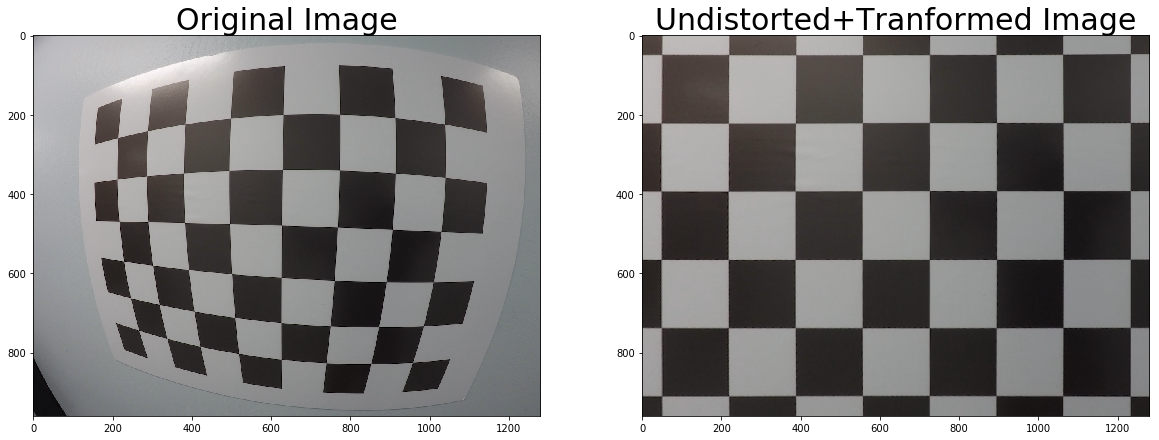

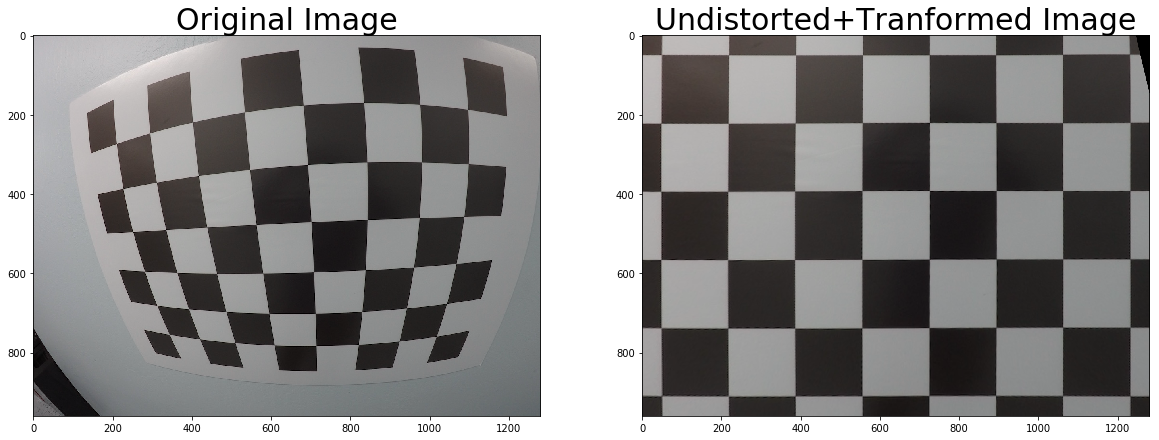

In [6]:
for index, fname in enumerate(images):
    img = cv2.imread(fname)
    warped = corners_unwarp(img, nx, ny, mtx, dist)
    if warped is not None:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=30)
        ax2.imshow(warped)
        ax2.set_title('Undistorted+Tranformed Image', fontsize=30)